## Expert Level

In [1]:
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter
from skimage import data, io, filters
from skimage import feature as ft
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

### 1.Reading images

In [6]:
dataset_path = "F:\\NUS SOC Summer Workshop\\Project 1_ Traffic Sign Recogniti\\Dataset_1\\images"

X = []
y = []
for i in glob.glob(dataset_path + '\\*.png', recursive=True):
    
    label = i.split("images")[1][1:4]
    y.append(label)
    # write code to read ecah file i, and append it to list X
    X.append(cv2.imread(i))


# you should have X, y with 5998 entries on each.
print(len(y))
print(len(X))

5998
5998


### 2.Pre-processing images

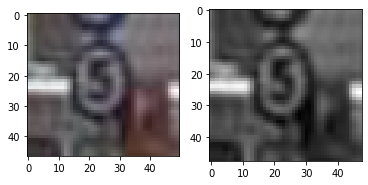

In [7]:
X_processed=[]
for x in X:
    # Write code to resize image x to 48x48 and store in temp_x
    temp_x = cv2.resize(x, (48, 48))
    # Write code to convert temp_x to grayscale
    temp_x_gray = cv2.cvtColor(temp_x, cv2.COLOR_BGR2GRAY)
    # Append the converted image into X_processed
    X_processed.append(temp_x_gray)
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(X[1])
fig.add_subplot(1, 2, 2)
plt.imshow(X_processed[1],cmap='gray')

### 3.Calculating Features and Splitting train/testsets

In [9]:
X_features = []
for x in X_processed:
    x_feature = ft.hog(x, orientations=8, pixels_per_cell=(10, 10),cells_per_block=(1, 1), visualize=False, multichannel=False)
    X_features.append(x_feature)
# write code to Split training & testing sets using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size = 0.2)
print(len(X_train),len(X_test),len(y_train),len(y_test))

4798 1200 4798 1200


### 4.Training and testing the classifier

#### 4.1 SVM

In [10]:
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy_SVM=clf.score(X_test, y_test)
accuracy_SVM

0.9441666666666667

#### 4.2 RandomForest classifier

In [29]:
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)
accuracy_rfclf=rfclf.score(X_test, y_test)
accuracy_rfclf

0.975

#### 4.3 Gaussian Naive Bayes

In [30]:
gnbclf = GaussianNB()
gnbclf.fit(X_train, y_train)
accuracy_gnbclf=gnbclf.score(X_test, y_test)
accuracy_gnbclf

0.7816666666666666

#### 4.4 k-Nearest Neighbours classifier

In [36]:
# the number of neighbours (k) in values of [1, 3, 5, 7, 9]
result = []
for i in range(1, 6):
    kneighclf = KNeighborsClassifier(n_neighbors=2*i-1)
    kneighclf.fit(X_train, y_train)
    result.append(kneighclf.score(X_test, y_test))
accuracy_kneighclf=max(result)
result

[0.9683333333333334,
 0.8508333333333333,
 0.8366666666666667,
 0.8233333333333334,
 0.8025]

#### Showing the results of different calssifier

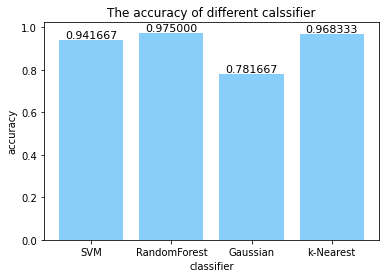

In [59]:
name = ['SVM','RandomForest','Gaussian','k-Nearest']
accu= [accuracy_SVM, accuracy_rfclf,accuracy_gnbclf, accuracy_kneighclf]
plt.bar(name, accu, color="#87CEFA")
plt.xlabel('classifier')
plt.ylabel("accuracy")
plt.title("The accuracy of different calssifier")
for a, b in zip(name, accu):
    plt.text(a, b, '%.6f' % b, ha='center', va='bottom', fontsize=11)
plt.show()